# LacI binding model from [Genotype to Phenotype Mapping and the Fitness Landscape of the E. coli lac Promoter](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061570)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import scipy.misc
import scipy.stats
from itertools import combinations, product

plt.style.use(["ggplot", "../.default.mplstyle"])

%matplotlib inline

In [2]:
from matplotlib.colors import LogNorm

def scatterHeatmap(x, y, bins=50, weights=None,):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, weights=weights)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.imshow(heatmap.T, extent=extent, origin='lower', norm=LogNorm(), aspect='auto')
    # plt.colorbar()

In [515]:
opt = "-best" # other options are "-full" and ""

linear = pd.read_csv("data/lac-params{}-linear.csv".format(opt), index_col=0)
quad = pd.read_csv("data/lac-params{}-quad.csv".format(opt), index_col=0)

In [516]:
linear.head()

,Coefficients
Site number,
NaN,6.656500
-1.1,0.000000
-1.2,-0.094504
-1.3,-0.811306
-2.1,-1.125546


In [519]:
# resort quad to match linear order
quad = quad.sort_index(ascending=False)

quad.columns = quad.columns.astype(float)
quad = quad.sort_index(1, ascending=False)

quad.head()

,-1.1,-1.2,-1.3,-2.1,-2.2,-2.3,-3.1,-3.2,-3.3,-4.1,...,-72.3,-73.1,-73.2,-73.3,-74.1,-74.2,-74.3,-75.1,-75.2,-75.3
Sites,,,,,,,,,,,,,,,,,,,,,
-1.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.0,0
-1.2,0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.298841,0.0,0.0,0.000000,...,0,-0.198874,0.000000,0,0.000000,0.000000,0,0.000000,0.0,0
-1.3,0.000000,0.000000,0.0,0.0,-0.092914,0.0,0.000000,0.0,0.0,0.000000,...,0,0.000000,-0.245813,0,-0.135046,0.067148,0,0.096003,0.0,0
-2.1,0.080659,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,...,0,0.000000,0.000000,0,0.000000,0.000000,0,0.000000,0.0,0
-2.2,0.058776,0.187437,0.0,0.0,0.000000,0.0,0.280103,0.0,0.0,0.325751,...,0,0.208132,0.000000,0,-0.001804,0.000000,0,-0.057728,0.0,0


In [521]:
quad.index == quad.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [514]:
quad.columns[:10]

Index(['-1.1', '-1.2', '-1.3', '-10.1', '-10.2', '-10.3', '-11.1', '-11.2',
       '-11.3', '-12.1'],
      dtype='object')

In [6]:
x = np.zeros(226)
wt = np.zeros(linear.shape[0]); wt[0] = 1

# the fitness function defined by the parameters
def f(x):
    return np.dot(linear.values[:,0], x) + np.dot(x[1:], np.dot(quad, x[1:]))

In [7]:
# marker positions

rnap1 = 75 - np.arange(7, 13)
rnap2 = 75 - np.arange(31, 38)

crp1 = 75 - np.arange(54, 59)
crp2 = 75 - np.arange(65, 70)

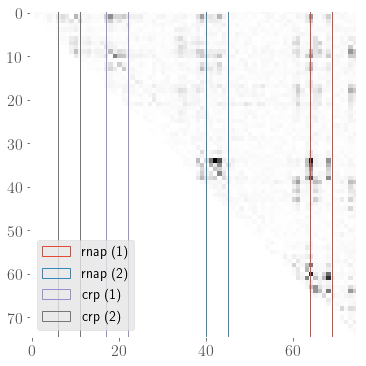

In [494]:
coeff = quad.values
coeff = np.abs(coeff)
coeff = np.tril(coeff) + np.triu(coeff).T

# combine all coefficients at each position
coeff = coeff[::3, ::3] + coeff[::3,1::3]   + coeff[::3,2::3] +\
        coeff[1::3,::3] + coeff[1::3, 1::3] + coeff[1::3,2::3] + \
        coeff[2::3,::3] + coeff[2::3, 1::3] + coeff[2::3,2::3]

_, ax = plt.subplots(figsize=(8,6))
plt.imshow(coeff.T, cmap="Greys");
plt.grid(False)

for i, (nm, mrk) in enumerate([("rnap (1)", rnap1), ("rnap (2)", rnap2), ("crp (1)", crp1), ("crp (2)", crp2)]):
    rect = patches.Rectangle((mrk.min(),-1), mrk.shape[0], 76, linewidth=1, facecolor='none', label=nm, edgecolor="C{}".format(i))
    ax.add_patch(rect)
    
plt.legend(loc="lower left")
plt.savefig("figures/lac-coefficients.pdf", bbox_inches="tight")

In [499]:
crp1

array([21, 20, 19, 18, 17])

In [505]:
coeff[np.arange(5), :][:, np.arange(5)]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.58339033, 0.58105907, 0.        , 0.        , 0.        ],
       [0.58973336, 0.13995055, 0.10476443, 0.        , 0.        ],
       [0.16427095, 0.47845552, 0.266769  , 0.21184722, 0.        ],
       [0.4421013 , 1.17218502, 0.80917316, 0.01637988, 0.14925143]])

In [506]:
linear.head()

,Coefficients
Site number,
NaN,6.656500
-1.1,0.000000
-1.2,-0.094504
-1.3,-0.811306
-2.1,-1.125546


In [51]:
def buildSpace(ind, mutrate, R=3, linear=linear, quad=quad):
    
    P = linear.shape[0]
    N = ind.shape[0]
    M = len(mutrate)
    
    def f(x):
        return np.dot(linear.values[:,0], x) + np.dot(x[1:], np.dot(quad, x[1:]))
    
    sample_space = np.array(list(combinations(np.arange(N), R)))
    S = sample_space.shape[0]
    
    # add mutation options
    sample_space = np.repeat(sample_space, M, axis=0)
    sample_space = np.column_stack((sample_space, np.tile(mutrate, S)))
    
    fit = []
    prob = []
    xx = []
    ss = sample_space[:, :-1].astype(int)
    for i in range(sample_space.shape[0]):
        
        mr = sample_space[i, -1]
        
        fit.append([])
        prob.append([])
        xx.append([])

        # all possible mutations
        for perm in product(*[np.arange(4)]*R):
            
            x = np.zeros(P)
            x[0] = 1

            # these are the non-zero indicies
            tmp, = np.where(perm)

            perm = np.array(perm)
            
            x[(ind*3)[ss[i, tmp]] + perm[tmp]] = 1
            
            fit[-1].append(f(x))
            xx[-1].append(x)
            prob[-1].append(scipy.stats.binom.pmf(x[1:].sum(), N, mr))
    
    fit = np.array(fit)
    x = np.array(xx)
    prob = np.array(prob)
    
    return x, sample_space, prob, fit, f

In [237]:
ind = np.sort(np.concatenate((rnap1, rnap2)))
x, ss, p, ft, _ = buildSpace(ind, [.01, .1, .5], )

mind, = np.where(np.any(np.any(x[:, :, 1:]==1, axis=0), axis=0))
mind = mind + 1
mx = x[:, :, mind]

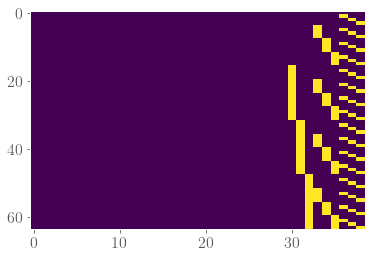

In [238]:
plt.imshow(mx[-1, :, :], aspect="auto")
plt.grid(False)

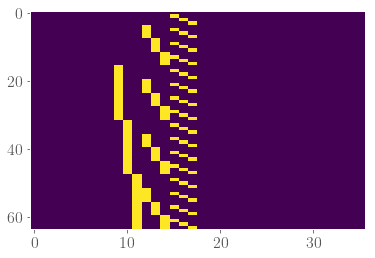

In [233]:
plt.imshow(x[-1, :, 190:], aspect="auto")
plt.grid(False)

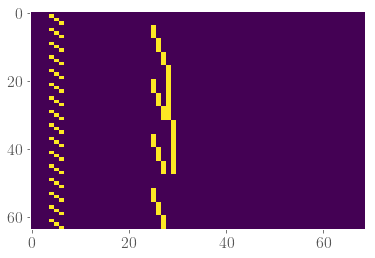

In [198]:
plt.imshow(mmx[np.arange(V) + V*i, :], aspect="auto")
plt.grid(False)

In [277]:
import attr
from objective import Objective

@attr.s
class Enumerated(Objective):
    x = attr.ib(default=None)
    y = attr.ib(default=None)

    def _eval(self, x):
        return self.y[self.lookup(x)]
    
    def lookup(self, x):
        "find the index of the input value"
        if x.ndim > 1 and x.shape[0] > 1:
            print (x.shape)
            return np.apply_along_axis(self.lookup, 1, x)
        elif x.ndim == 1:
            x = x[None, :]

        i = np.argmax(np.all(self.x==x, axis=1))
        print(i)
        return i
    
    @property
    def optimum(self):
        return self.x[np.argmax(self.y)]

    @property
    def range(self):
        return np.array([[x.min(), x.max()]])

    @property
    def kernel(self):
        return GPy.kern.Linear(self.d, ARD=True)



In [319]:
ind = np.concatenate((rnap1, rnap2))
x, ss, p, ft, _ = buildSpace(ind, [.01, .1, .5], )

mind, = np.where(np.any(np.any(x[:, :, 1:]==1, axis=0), axis=0))
mind = mind+1
mx = x[:, :, mind]

In [320]:
o = Enumerated(mmx.shape[1], mmx, fft)

In [321]:
o(o.optimum)

318367


13.988681329000002

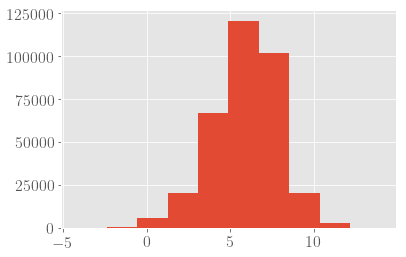

In [318]:
plt.hist(fft);

In [279]:
d.sample(2)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [290]:
o(d.sample(2))

(2, 69)
28
32


array([4.18534915, 2.67258876])

In [284]:
o.y.shape

(5313, 64)

In [202]:
ss[3, :]

array([0.  , 1.  , 3.  , 0.01])

In [131]:
mx.shape

(5313, 64, 69)

In [132]:
p.shape

(5313, 64)

In [133]:
ft.shape

(5313, 64)

In [301]:
reload(distribution)

V = p.shape[1]
i = 19
d = distribution.Discrete(mmx[np.arange(V) + V*i, :], p[:, i])

1.0

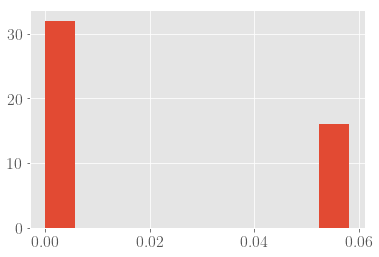

In [310]:
plt.hist([d.pdf(s)[0] for s in d.support]);
np.sum([d.pdf(s)[0] for s in d.support])

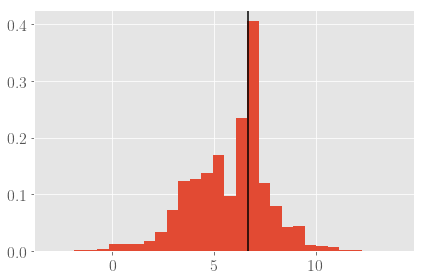

In [260]:
ind = np.concatenate((rnap1, rnap2))
x, ss, p, ft, _ = buildSpace(ind, [.01, .1, .5], )

mind, = np.where(np.any(np.any(x[:, :, 1:]==1, axis=0), axis=0))
mind = mind+1
mx = x[:, :, mind]

np.save("data/lac/rnap/x.npy", x)
np.save("data/lac/rnap/sample-space.npy", ss)
np.save("data/lac/rnap/prob.npy", p)
np.save("data/lac/rnap/fit.npy", ft)
np.save("data/lac/rnap/mx.npy", mx)

plt.hist(ft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.tight_layout()
plt.savefig("figures/fitness-rnap.pdf",bbox_inches="tight")

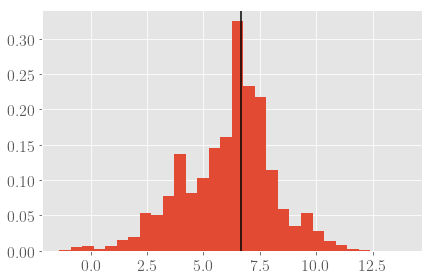

In [261]:
ind = np.concatenate((crp1, crp2))
x, ss, p, ft, _ = buildSpace(ind, [.01, .1, .5], )

mind, = np.where(np.any(np.any(x[:, :, 1:]==1, axis=0), axis=0))
mind = mind+1
mx = x[:, :, mind]

np.save("data/lac/crp/x.npy", x)
np.save("data/lac/crp/sample-space.npy", ss)
np.save("data/lac/crp/prob.npy", p)
np.save("data/lac/crp/fit.npy", ft)
np.save("data/lac/crp/mx.npy", mx)

plt.hist(ft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.tight_layout()
plt.savefig("figures/fitness-crp.pdf",bbox_inches="tight")

In [312]:
def origdist(x):
    x = x.reshape((x.shape[0], 1, x.shape[1]))
    return np.sqrt(np.power(x - x.swapaxes(0, 1), 2).sum(2))

def newdist(x):
    return scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(x))

In [316]:
z = np.random.rand(50, 3)

np.allclose(origdist(z), newdist(z))

True

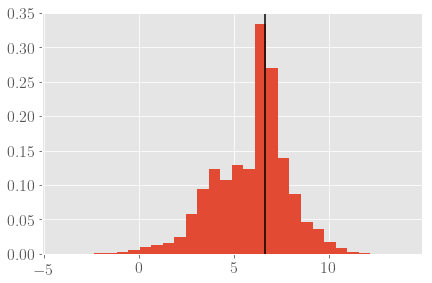

In [262]:
ind = np.concatenate((crp1, crp2, rnap1, rnap2))
x, ss, p, ft, _ = buildSpace(ind, [.01, .1, .5], )

mind, = np.where(np.any(np.any(x[:, :, 1:]==1, axis=0), axis=0))
mind = mind+1
mx = x[:, :, mind]

np.save("data/lac/full/x.npy", x)
np.save("data/lac/full/sample-space.npy", ss)
np.save("data/lac/full/prob.npy", p)
np.save("data/lac/full/fit.npy", ft)
np.save("data/lac/full/mx.npy", mx)

plt.hist(ft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.tight_layout()
plt.savefig("figures/fitness-full.pdf",bbox_inches="tight")

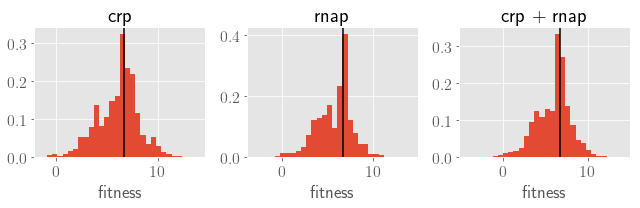

In [124]:
crpft = np.load("data/lac/crp/fit.npy")
rnapft = np.load("data/lac/rnap/fit.npy")
fullft = np.load("data/lac/full/fit.npy")

plt.figure(figsize=(9,3))

plt.subplot(131)
plt.hist(crpft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.xlabel("fitness")
plt.title("crp")

plt.subplot(132)
plt.hist(rnapft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.xlabel("fitness")
plt.title("rnap")

plt.subplot(133)
plt.hist(fullft.ravel(), bins=30, density=True);
plt.axvline(f(wt), c='k')
plt.tight_layout()
plt.xlabel("fitness")
plt.title("crp + rnap")

plt.savefig("figures/lac-fitness-distribution.pdf", bbox_inches="tight")

# test model 

In [57]:
import GPy

In [58]:
mmx = mx.reshape((mx.shape[0] * mx.shape[1], mx.shape[2]))
fft = ft.ravel()

mmx.shape

(340032, 69)

In [59]:
mmx[100].shape

(69,)

In [60]:
fft[np.argmax(np.all(mmx==mmx[100][None,:], axis=1))]

2.6725887630000003

In [61]:
np.where(mmx[36])

(array([25, 29]),)

In [62]:
np.where(mmx[100])

(array([25, 29]),)

## low sample size

In [105]:
select = np.random.choice(np.arange(mmx.shape[0]), 10, replace=False)

In [106]:
m = GPy.models.GPRegression(
    mmx[select, :], ft.ravel()[select][:,None], GPy.kern.Linear(mx.shape[2],ARD=True)
        )
m.optimize()
print(m)


Name : GP regression
Objective : 22.57191721849589
Number of Parameters : 70
Number of Optimization Parameters : 70
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  linear.variances         |                  (69,)  |      +ve      |        
  Gaussian_noise.variance  |  3.219866657741169e-11  |      +ve      |        


In [107]:
m.kern.variances

index,GP_regression.linear.variances,constraints,priors
[0],1.00000000,+ve,
[1],1.00000000,+ve,
[2],1.00000000,+ve,
[3],17.12636278,+ve,
[4],1.00000000,+ve,
[5],1.00000000,+ve,
[6],1.00000000,+ve,
[7],1.00000000,+ve,
[8],1.00000000,+ve,
[9],30.40557650,+ve,


In [108]:
mu, var = m.predict(mmx)
low_mu = mu

Text(0, 0.5, 'actual')

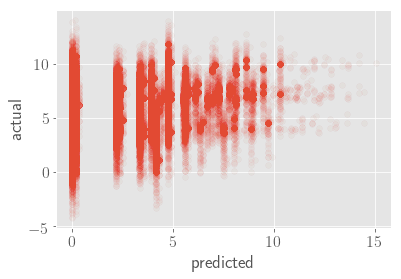

In [109]:
plt.scatter(mu, fft, alpha=.01);
plt.xlabel("predicted")
plt.ylabel("actual")

## med sample size

In [110]:
select = np.random.choice(np.arange(mmx.shape[0]), 100, replace=False)

In [111]:
m = GPy.models.GPRegression(
    mmx[select, :], ft.ravel()[select][:,None], GPy.kern.Linear(mx.shape[2],ARD=True)
        )
# m.likelihood.variance.fix(0)
m.optimize()
print(m)


Name : GP regression
Objective : 266.1558259400046
Number of Parameters : 70
Number of Optimization Parameters : 70
Updates : True
Parameters:
  GP_regression.           |             value  |  constraints  |  priors
  linear.variances         |             (69,)  |      +ve      |        
  Gaussian_noise.variance  |  5.03508799094028  |      +ve      |        


In [112]:
m.kern.variances

index,GP_regression.linear.variances,constraints,priors
[0],1.00000000,+ve,
[1],0.00002121,+ve,
[2],0.00000001,+ve,
[3],0.00001314,+ve,
[4],10.00782970,+ve,
[5],11.56953318,+ve,
[6],25.62704018,+ve,
[7],40.52889832,+ve,
[8],8.24989711,+ve,
[9],3.58460406,+ve,


In [113]:
mu, var = m.predict(mmx)
med_mu = mu

Text(0, 0.5, 'actual')

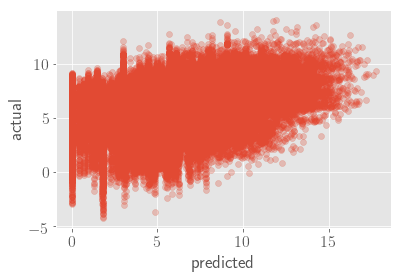

In [114]:
plt.scatter(mu, fft, alpha=.1);
plt.xlabel("predicted")
plt.ylabel("actual")

## hi sample size

In [115]:
select = np.random.choice(np.arange(mmx.shape[0]), 1000, replace=False)

In [116]:
m = GPy.models.GPRegression(
    mmx[select, :], ft.ravel()[select][:,None], GPy.kern.Linear(mx.shape[2],ARD=True)
        )
# m.likelihood.variance.fix(0)
m.optimize()
print(m)


Name : GP regression
Objective : 2353.2094426076824
Number of Parameters : 70
Number of Optimization Parameters : 70
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |  priors
  linear.variances         |               (69,)  |      +ve      |        
  Gaussian_noise.variance  |  5.2198345195932045  |      +ve      |        


In [117]:
mu, var = m.predict(mmx)
hi_mu = mu

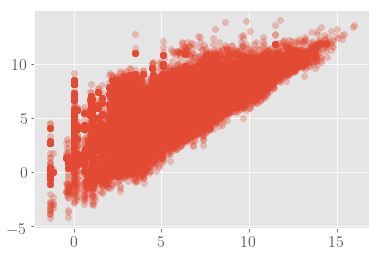

In [118]:
plt.scatter(mu, fft, alpha=.1);

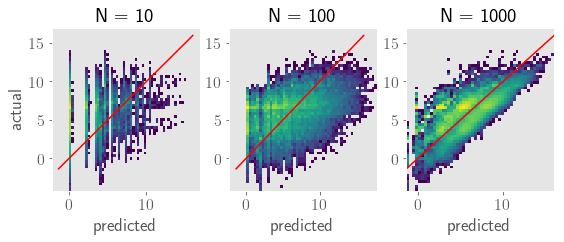

In [119]:
plt.figure(figsize=(9, 3))

plt.subplot(131)
scatterHeatmap(low_mu[:,0], fft)
plt.plot([mu.min(), mu.max()], [mu.min(), mu.max()], c="r")
plt.grid(False)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("N = 10")

plt.subplot(132)
scatterHeatmap(med_mu[:,0], fft)
plt.plot([mu.min(), mu.max()], [mu.min(), mu.max()], c="r")
plt.grid(False)
plt.xlabel("predicted")
plt.title("N = 100")

plt.subplot(133)
scatterHeatmap(hi_mu[:,0], fft)
plt.plot([mu.min(), mu.max()], [mu.min(), mu.max()], c="r")
plt.grid(False)
plt.xlabel("predicted")
plt.title("N = 1000")

plt.savefig("figures/lac-gp-predict.pdf", bbox_inches="tight")

#  old

In [23]:
# size
N = 23

# randomized positions
R = 3

# mutation rates
M = 3

# number of unique position configurations
C = int(scipy.misc.comb(N, 3))

# sample space
S = C * 4**R

# num hyperparam
H = C * M

C, S, H

/Users/pdt2/dev/stochastic-sampling-bayesian-optimization/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  # This is added back by InteractiveShellApp.init_path()


(1771, 113344, 5313)

In [612]:
C

1771

In [336]:
sample_space = np.array(list(combinations(np.arange(N), R)))
sample_space[:10, :]

array([[ 0,  1,  2],
       [ 0,  1,  3],
       [ 0,  1,  4],
       [ 0,  1,  5],
       [ 0,  1,  6],
       [ 0,  1,  7],
       [ 0,  1,  8],
       [ 0,  1,  9],
       [ 0,  1, 10],
       [ 0,  1, 11]])

In [337]:
def expand_index(ind):
    "take indexes in nucleotide position and expand to mutational position"
    
    return 1 + 3*np.repeat(ind, 3) + np.tile(np.arange(3), len(ind))

def sample(pos, mut, ind):
    """
    pos: positions to be mutated
    mut: mutation rate
    ind: global index (which positions are being mutated)
    """
    R = len(pos)
    
    # which positions are mutated
    variants = np.random.rand(R) < mut
    variants, = np.where(variants)
    
    # which variant value
    val = np.random.choice(np.arange(3), R, replace=True)
    
    print(variants, val, 3*ind[variants]+val[variants])
    
    x = np.zeros(linear.shape[0])

    # intercept
    x[0] = 1
    
    # expand variants to complete index space 
    # (3 per position, val for which nucelotide, and 1 for intercept)
    x[3*ind[variants] + val[variants] + 1] = 1
    
    return x
    

In [338]:
np.where(sample([0, 1, 2], .33, np.arange(10, 20)))

[2] [2 0 2] [38]


(array([ 0, 39]),)

In [441]:
# ind = np.concatenate((rnap1, rnap2, crp1,crp2))
ind = np.concatenate((rnap1, rnap2))
# ind = np.concatenate((crp1,crp2))

# ind = np.random.choice(np.arange(75), 20, replace=False)

N = ind.shape[0]

sample_space = np.array(list(combinations(np.arange(N), R)))

In [458]:
fit = []

for i in range(sample_space.shape[0]):
    
    # all possible mutations
    for perm in product(np.arange(4), np.arange(4), np.arange(4)):
        
        x = np.zeros(linear.shape[0])
        x[0] = 1
        
        # these are the non-zero indicies
        tmp, = np.where(perm)
        
        perm = np.array(perm)
        
        print((ind*3)[sample_space[i, tmp]])
        
        x[(ind*3)[sample_space[i, tmp]] + perm[tmp]] = 1
        fit.append(f(x))
    
    # all three mutate
#     for perm in product(np.arange(3), np.arange(3), np.arange(3)):
#         x[(ind*3)[sample_space] + np.array(perm)] = 1
#         fit.append(f(x))
        
#     # just two
#     for perm in product(np.arange(3), np.arange(3)):
#         x[(ind*3)[sample_space] + np.array(perm)] = 1
#         fit.append(f(x))

[]
[198]
[198]
[198]
[201]
[201 198]
[201 198]
[201 198]
[201]
[201 198]
[201 198]
[201 198]
[201]
[201 198]
[201 198]
[201 198]
[204]
[204 198]
[204 198]
[204 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204]
[204 198]
[204 198]
[204 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204]
[204 198]
[204 198]
[204 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[204 201]
[204 201 198]
[204 201 198]
[204 201 198]
[]
[195]
[195]
[195]
[201]
[201 195]
[201 195]
[201 195]
[201]
[201 195]
[201 195]
[201 195]
[201]
[201 195]
[201 195]
[201 195]
[204]
[204 195]
[204 195]
[204 195]
[204 201]
[204 201 195]
[204 201 195]
[204 201 195]
[204 201]
[204 201 195]
[204 201 195]
[204 201 195]
[204 201]
[204 201 195]
[2

[204 198 138]
[204 198 138]
[204]
[204 138]
[204 138]
[204 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[204]
[204 138]
[204 138]
[204 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[204 198]
[204 198 138]
[204 198 138]
[204 198 138]
[]
[135]
[135]
[135]
[198]
[198 135]
[198 135]
[198 135]
[198]
[198 135]
[198 135]
[198 135]
[198]
[198 135]
[198 135]
[198 135]
[204]
[204 135]
[204 135]
[204 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204]
[204 135]
[204 135]
[204 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204 198]
[204 198 135]
[204 198 135]
[204 198 135]
[204]
[204 135]
[204 135]
[204 135]
[204 198]
[204 198 135]
[204 198 135]
[

[204 195 120]
[204 195 120]
[204 195 120]
[204 195]
[204 195 120]
[204 195 120]
[204 195 120]
[204]
[204 120]
[204 120]
[204 120]
[204 195]
[204 195 120]
[204 195 120]
[204 195 120]
[204 195]
[204 195 120]
[204 195 120]
[204 195 120]
[204 195]
[204 195 120]
[204 195 120]
[204 195 120]
[]
[189]
[189]
[189]
[192]
[192 189]
[192 189]
[192 189]
[192]
[192 189]
[192 189]
[192 189]
[192]
[192 189]
[192 189]
[192 189]
[204]
[204 189]
[204 189]
[204 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204]
[204 189]
[204 189]
[204 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204]
[204 189]
[204 189]
[204 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[204 192]
[204 192 189]
[204 192 189]
[204 192 189]
[]
[138]


[204 189 120]
[204 189 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204]
[204 120]
[204 120]
[204 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204]
[204 120]
[204 120]
[204 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[204 189]
[204 189 120]
[204 189 120]
[204 189 120]
[]
[135]
[135]
[135]
[138]
[138 135]
[138 135]
[138 135]
[138]
[138 135]
[138 135]
[138 135]
[138]
[138 135]
[138 135]
[138 135]
[204]
[204 135]
[204 135]
[204 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204]
[204 135]
[204 135]
[204 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204 138]
[204 138 135]
[204 138 135]
[204 138 135]
[204]
[204 135]
[204 13

[204 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204]
[204 120]
[204 120]
[204 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204]
[204 120]
[204 120]
[204 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[204 132]
[204 132 120]
[204 132 120]
[204 132 120]
[]
[126]
[126]
[126]
[129]
[129 126]
[129 126]
[129 126]
[129]
[129 126]
[129 126]
[129 126]
[129]
[129 126]
[129 126]
[129 126]
[204]
[204 126]
[204 126]
[204 126]
[204 129]
[204 129 126]
[204 129 126]
[204 129 126]
[204 129]
[204 129 126]
[204 129 126]
[204 129 126]
[204 129]
[204 129 126]
[204 129 126]
[204 129 126]
[204]
[204 126]
[204 126]
[204 126]
[204 129]
[204 129 126]
[204 129 126]
[204 129 126]
[204 129]
[204 129 126]
[204 129 126]
[20

[198]
[198 123]
[198 123]
[198 123]
[198]
[198 123]
[198 123]
[198 123]
[201]
[201 123]
[201 123]
[201 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201]
[201 123]
[201 123]
[201 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201]
[201 123]
[201 123]
[201 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[201 198]
[201 198 123]
[201 198 123]
[201 198 123]
[]
[120]
[120]
[120]
[198]
[198 120]
[198 120]
[198 120]
[198]
[198 120]
[198 120]
[198 120]
[198]
[198 120]
[198 120]
[198 120]
[201]
[201 120]
[201 120]
[201 120]
[201 198]
[201 198 120]
[201 198 120]
[201 198 120]
[201 198]
[201 198 120]
[201 198 120]
[201 198 120]
[201 198]
[201 198 120]
[201 198 120]
[201 198 120]
[201]
[201 120]
[201 120]
[201 

[201 132]
[201 132]
[201 192]
[201 192 132]
[201 192 132]
[201 192 132]
[201 192]
[201 192 132]
[201 192 132]
[201 192 132]
[201 192]
[201 192 132]
[201 192 132]
[201 192 132]
[]
[129]
[129]
[129]
[192]
[192 129]
[192 129]
[192 129]
[192]
[192 129]
[192 129]
[192 129]
[192]
[192 129]
[192 129]
[192 129]
[201]
[201 129]
[201 129]
[201 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201]
[201 129]
[201 129]
[201 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201]
[201 129]
[201 129]
[201 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[201 192]
[201 192 129]
[201 192 129]
[201 192 129]
[]
[126]
[126]
[126]
[192]
[192 126]
[192 126]
[192 126]
[192]
[192 126]
[192 126]
[192 126]
[192]
[192 126]
[192 126]


[201 138]
[201 138 126]
[201 138 126]
[201 138 126]
[201 138]
[201 138 126]
[201 138 126]
[201 138 126]
[201]
[201 126]
[201 126]
[201 126]
[201 138]
[201 138 126]
[201 138 126]
[201 138 126]
[201 138]
[201 138 126]
[201 138 126]
[201 138 126]
[201 138]
[201 138 126]
[201 138 126]
[201 138 126]
[]
[123]
[123]
[123]
[138]
[138 123]
[138 123]
[138 123]
[138]
[138 123]
[138 123]
[138 123]
[138]
[138 123]
[138 123]
[138 123]
[201]
[201 123]
[201 123]
[201 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201]
[201 123]
[201 123]
[201 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201]
[201 123]
[201 123]
[201 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]
[201 138]
[201 138 123]
[201 138 123]
[201 138 123]

[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201]
[201 123]
[201 123]
[201 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201]
[201 123]
[201 123]
[201 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[201 126]
[201 126 123]
[201 126 123]
[201 126 123]
[]
[120]
[120]
[120]
[126]
[126 120]
[126 120]
[126 120]
[126]
[126 120]
[126 120]
[126 120]
[126]
[126 120]
[126 120]
[126 120]
[201]
[201 120]
[201 120]
[201 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201]
[201 120]
[201 120]
[201 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201 126]
[201 126 120]
[201 126 120]
[201 126 120]
[201]
[201 120]
[201 120]
[201 120]
[201 126]
[201 

[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198]
[198 132]
[198 132]
[198 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198]
[198 132]
[198 132]
[198 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[198 192]
[198 192 132]
[198 192 132]
[198 192 132]
[]
[129]
[129]
[129]
[192]
[192 129]
[192 129]
[192 129]
[192]
[192 129]
[192 129]
[192 129]
[192]
[192 129]
[192 129]
[192 129]
[198]
[198 129]
[198 129]
[198 129]
[198 192]
[198 192 129]
[198 192 129]
[198 192 129]
[198 192]
[198 192 129]
[198 192 129]
[198 192 129]
[198 192]
[198 192 129]
[198 192 129]
[198 192 129]
[198]
[198 129]
[198 129]
[198 129]
[198 192]
[198 192 129]
[198 192 129]
[198 192 129]
[198 192]
[198 192 129]
[198 192 129]
[198 192 129]

[138 126]
[138 126]
[138]
[138 126]
[138 126]
[138 126]
[198]
[198 126]
[198 126]
[198 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198]
[198 126]
[198 126]
[198 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198]
[198 126]
[198 126]
[198 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[198 138]
[198 138 126]
[198 138 126]
[198 138 126]
[]
[123]
[123]
[123]
[138]
[138 123]
[138 123]
[138 123]
[138]
[138 123]
[138 123]
[138 123]
[138]
[138 123]
[138 123]
[138 123]
[198]
[198 123]
[198 123]
[198 123]
[198 138]
[198 138 123]
[198 138 123]
[198 138 123]
[198 138]
[198 138 123]
[198 138 123]
[198 138 123]
[198 138]
[198 138 123]
[198 138 123]
[198 138 123]
[198]
[198 123]
[198 123]
[198 123]
[198 138]
[

[198 129 120]
[]
[123]
[123]
[123]
[126]
[126 123]
[126 123]
[126 123]
[126]
[126 123]
[126 123]
[126 123]
[126]
[126 123]
[126 123]
[126 123]
[198]
[198 123]
[198 123]
[198 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198]
[198 123]
[198 123]
[198 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198]
[198 123]
[198 123]
[198 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[198 126]
[198 126 123]
[198 126 123]
[198 126 123]
[]
[120]
[120]
[120]
[126]
[126 120]
[126 120]
[126 120]
[126]
[126 120]
[126 120]
[126 120]
[126]
[126 120]
[126 120]
[126 120]
[198]
[198 120]
[198 120]
[198 120]
[198 126]
[198 126 120]
[198 126 120]
[198 126 120]
[198 126]
[198 126 120]
[198 126 120]
[198 126 120]
[198 126]
[1

[195 189]
[195 189 129]
[195 189 129]
[195 189 129]
[195 189]
[195 189 129]
[195 189 129]
[195 189 129]
[195]
[195 129]
[195 129]
[195 129]
[195 189]
[195 189 129]
[195 189 129]
[195 189 129]
[195 189]
[195 189 129]
[195 189 129]
[195 189 129]
[195 189]
[195 189 129]
[195 189 129]
[195 189 129]
[]
[126]
[126]
[126]
[189]
[189 126]
[189 126]
[189 126]
[189]
[189 126]
[189 126]
[189 126]
[189]
[189 126]
[189 126]
[189 126]
[195]
[195 126]
[195 126]
[195 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195]
[195 126]
[195 126]
[195 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195]
[195 126]
[195 126]
[195 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]
[195 189]
[195 189 126]
[195 189 126]
[195 189 126]

[132 129]
[132]
[132 129]
[132 129]
[132 129]
[132]
[132 129]
[132 129]
[132 129]
[195]
[195 129]
[195 129]
[195 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195]
[195 129]
[195 129]
[195 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195]
[195 129]
[195 129]
[195 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[195 132]
[195 132 129]
[195 132 129]
[195 132 129]
[]
[126]
[126]
[126]
[132]
[132 126]
[132 126]
[132 126]
[132]
[132 126]
[132 126]
[132 126]
[132]
[132 126]
[132 126]
[132 126]
[195]
[195 126]
[195 126]
[195 126]
[195 132]
[195 132 126]
[195 132 126]
[195 132 126]
[195 132]
[195 132 126]
[195 132 126]
[195 132 126]
[195 132]
[195 132 126]
[195 132 126]
[195 132 126]
[195]
[195 126]
[195 

[192 189 129]
[192 189]
[192 189 129]
[192 189 129]
[192 189 129]
[192 189]
[192 189 129]
[192 189 129]
[192 189 129]
[192]
[192 129]
[192 129]
[192 129]
[192 189]
[192 189 129]
[192 189 129]
[192 189 129]
[192 189]
[192 189 129]
[192 189 129]
[192 189 129]
[192 189]
[192 189 129]
[192 189 129]
[192 189 129]
[]
[126]
[126]
[126]
[189]
[189 126]
[189 126]
[189 126]
[189]
[189 126]
[189 126]
[189 126]
[189]
[189 126]
[189 126]
[189 126]
[192]
[192 126]
[192 126]
[192 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192]
[192 126]
[192 126]
[192 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192]
[192 126]
[192 126]
[192 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]
[192 189 126]
[192 189]
[192 189 126]
[192 189 126]

[192 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192]
[192 120]
[192 120]
[192 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192]
[192 120]
[192 120]
[192 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[192 135]
[192 135 120]
[192 135 120]
[192 135 120]
[]
[129]
[129]
[129]
[132]
[132 129]
[132 129]
[132 129]
[132]
[132 129]
[132 129]
[132 129]
[132]
[132 129]
[132 129]
[132 129]
[192]
[192 129]
[192 129]
[192 129]
[192 132]
[192 132 129]
[192 132 129]
[192 132 129]
[192 132]
[192 132 129]
[192 132 129]
[192 132 129]
[192 132]
[192 132 129]
[192 132 129]
[192 132 129]
[192]
[192 129]
[192 129]
[192 129]
[192 132]
[192 132 129]
[192 132 129]
[192 132 129]
[192 132]
[192 132 129]
[192 132 129]
[19

[189 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189]
[189 129]
[189 129]
[189 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189]
[189 129]
[189 129]
[189 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[189 138]
[189 138 129]
[189 138 129]
[189 138 129]
[]
[126]
[126]
[126]
[138]
[138 126]
[138 126]
[138 126]
[138]
[138 126]
[138 126]
[138 126]
[138]
[138 126]
[138 126]
[138 126]
[189]
[189 126]
[189 126]
[189 126]
[189 138]
[189 138 126]
[189 138 126]
[189 138 126]
[189 138]
[189 138 126]
[189 138 126]
[189 138 126]
[189 138]
[189 138 126]
[189 138 126]
[189 138 126]
[189]
[189 126]
[189 126]
[189 126]
[189 138]
[189 138 126]
[189 138 126]
[189 138 126]
[189 138]
[189 138 126]
[189 138 126]
[18

[189 129 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189]
[189 123]
[189 123]
[189 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189]
[189 123]
[189 123]
[189 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[189 129]
[189 129 123]
[189 129 123]
[189 129 123]
[]
[120]
[120]
[120]
[129]
[129 120]
[129 120]
[129 120]
[129]
[129 120]
[129 120]
[129 120]
[129]
[129 120]
[129 120]
[129 120]
[189]
[189 120]
[189 120]
[189 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189]
[189 120]
[189 120]
[189 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189 129]
[189 129 120]
[189 129 120]
[189 129 120]
[189]
[189 120]
[189 120]
[189 120]
[

[138 129 126]
[]
[123]
[123]
[123]
[129]
[129 123]
[129 123]
[129 123]
[129]
[129 123]
[129 123]
[129 123]
[129]
[129 123]
[129 123]
[129 123]
[138]
[138 123]
[138 123]
[138 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138]
[138 123]
[138 123]
[138 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138]
[138 123]
[138 123]
[138 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[138 129]
[138 129 123]
[138 129 123]
[138 129 123]
[]
[120]
[120]
[120]
[129]
[129 120]
[129 120]
[129 120]
[129]
[129 120]
[129 120]
[129 120]
[129]
[129 120]
[129 120]
[129 120]
[138]
[138 120]
[138 120]
[138 120]
[138 129]
[138 129 120]
[138 129 120]
[138 129 120]
[138 129]
[138 129 120]
[138 129 120]
[138 129 120]
[138 129]
[1

[135]
[135 120]
[135 120]
[135 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135]
[135 120]
[135 120]
[135 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135]
[135 120]
[135 120]
[135 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[135 123]
[135 123 120]
[135 123 120]
[135 123 120]
[]
[126]
[126]
[126]
[129]
[129 126]
[129 126]
[129 126]
[129]
[129 126]
[129 126]
[129 126]
[129]
[129 126]
[129 126]
[129 126]
[132]
[132 126]
[132 126]
[132 126]
[132 129]
[132 129 126]
[132 129 126]
[132 129 126]
[132 129]
[132 129 126]
[132 129 126]
[132 129 126]
[132 129]
[132 129 126]
[132 129 126]
[132 129 126]
[132]
[132 126]
[132 126]
[132 126]
[132 129]
[132 129 126]
[132 129 126]
[132 129 126]
[132 129]
[132 

In [419]:
len(fit)

18304

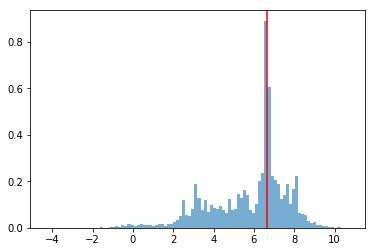

In [420]:
plt.hist(fit, bins=100, alpha=.6, density=True)
plt.axvline(f(wt), c="r")

In [607]:
p.shape

(5313, 64)

In [610]:
mmx.shape

(340032, 69)

# mutagensis

In [130]:
import distribution
import objective
import parameter
import attr
import GPy

In [179]:
@attr.s
class Choice(distribution.Distribution):
    
    p = attr.ib(default=[.5, .5])
    
    @property
    def c(self):
        "number of choices"
        return len(self.p)
    
    def sample(self, N=1):
        return np.random.choice(np.arange(self.c), N, p=self.p)
    
    def pdf(self, z):
        return [self.p[zz] for zz in z]
    
    def mean(self):
        # returning actually the mode here
        return np.arange(self.c)[np.argmax(self.p)]
        
        #return np.sum(np.arange(self.c) * np.array(self.p))

In [466]:
c = Choice([.5] + [.5/3]*3)
c.sample(10), c.pdf(c.sample(10)), c.mean()

(array([0, 1, 0, 1, 3, 2, 0, 0, 0, 0]),
 [0.5,
  0.5,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.5,
  0.16666666666666666,
  0.16666666666666666,
  0.5],
 0)

In [397]:
@attr.s
class LacI(objective.Objective):
    
    ind = attr.ib(default=None)
    _opt = attr.ib(default=None, init=False)
    
    def eval(self, x):
        x = np.array(x)

        if x.ndim == 1:
            x = x[None, :]
            
        return np.apply_along_axis(self._eval, 1, x).ravel()
        #return self._eval(x)
    
    def _eval(self, x):
        x = self.buildX(x)
        
        if x.ndim == 1:
            x = x[None, :]
        
        return np.dot(x, linear.values[:,0]) + np.dot(x[:, 1:], np.dot(quad, x[:, 1:].T))
    
    def buildX(self, z):
        if z.ndim > 1 and z.shape[0] > 1:
            return np.apply_along_axis(self.buildX, 1, z)
        elif z.ndim == 1:
            z = z[None, :]

        x = np.zeros(linear.shape[0])
        x[0] = 1
        
        _, tmp = np.where(z); #print(tmp)
        x[(self.ind*3)[tmp] + z[:, tmp]] = 1
        
        return x
    
    def range(self):
        return [[0, 3]] * self.d
    
    @property
    def optimum(self):
        if self._opt is None:
            x = self.sample_space()
            self._opt = x[np.argmax(self.eval(x)), :]
            
        return self._opt
    
    def sample_space(self, *args, **kwargs):
        return np.array(list(product(*[np.arange(4)]*self.d)))
    
    @property
    def kernel(self):
        return GPy.kern.Linear(self.d*3, ARD=True)

    @property
    def unrolled_ind(self):
        "active indices unrolled for different mutation values"
        return 1 + np.repeat(self.ind*3, 3) + np.tile(np.arange(3), self.ind.shape[0])


In [398]:
from modeler import Modeler
class LacIModeler(Modeler):

    def transform(self, x, reverse=False):
        z = x.copy()
        
        if reverse:
            raise ValueError("haven't done reverse yet!")

        x = self.objective.buildX(z)
        if x.ndim == 1:
            x = x[None, :]
        return x[:, self.objective.unrolled_ind]

    def input_space(self, *args, **kwargs):
        return self.transform(self.objective.input_space())

In [399]:
rnap1.shape, rnap2.shape, crp1.shape, crp2.shape

((5,), (5,), (5,), (5,))

In [569]:
ind = crp1
o = LacI(ind.shape[0], ind)
x = o.sample_space()
y = o(x)
ynorm = (y - y.mean())/y.std()

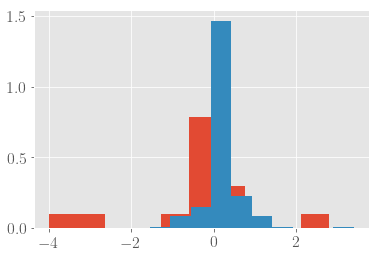

In [570]:
plt.hist(linear.values[o.unrolled_ind, 0], density=True)
plt.hist(quad.values[o.unrolled_ind, :][:, o.unrolled_ind].ravel(), density=True);

In [571]:
np.prod([c.pdf(x[:, i]) for i in range(x.shape[1])], 0).sum()

1.0

In [572]:
o.optimum

array([0, 2, 3, 3, 1])

In [402]:
o(o.optimum)

array([12.8123236])

In [581]:
m = LacIModeler(o, False, 3, o.kernel,)
m

LacIModeler(objective=LacI(d=5, ind=array([21, 20, 19, 18, 17]), _opt=array([0, 2, 3, 3, 1])), noiseless=False, resample=3, kernel=<GPy.kern.src.linear.Linear object at 0x13c5762b0>)

In [582]:
xtrain = x[np.random.choice(np.arange(x.shape[0]), 50, replace=False), :]
ytrain = o(xtrain)

mod = m.build(xtrain, ytrain)
print(mod)
print(mod.log_likelihood())


Name : GP regression
Objective : 39.68749305505064
Number of Parameters : 16
Number of Optimization Parameters : 16
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  linear.variances         |                (15,)  |      +ve      |        
  Gaussian_noise.variance  |  0.10668857959691222  |      +ve      |        
-39.68749305505064


In [566]:
print(mod.kern.variances)

  index  |  GP_regression.linear.variances  |  constraints  |  priors
  [0]    |                      0.07540637  |      +ve      |        
  [1]    |                      0.09954324  |      +ve      |        
  [2]    |                      0.06770155  |      +ve      |        
  [3]    |                      0.31039738  |      +ve      |        
  [4]    |                      0.13490572  |      +ve      |        
  [5]    |                      0.02677558  |      +ve      |        
  [6]    |                      0.00181800  |      +ve      |        
  [7]    |                      0.05472550  |      +ve      |        
  [8]    |                      0.21065999  |      +ve      |        
  [9]    |                      0.02334314  |      +ve      |        
  [10]   |                      1.41787988  |      +ve      |        
  [11]   |                      0.08231020  |      +ve      |        
  [12]   |                      0.25882897  |      +ve      |        
  [13]   |          

<ErrorbarContainer object of 3 artists>

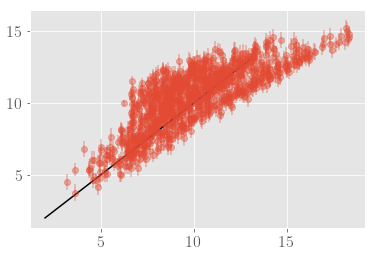

In [567]:
mu, var = mod.predict_noiseless(m.transform(x))

mu = mu*ytrain.std() + ytrain.mean()
var = var*ytrain.var()

# plt.scatter(mu, ynorm);
# plt.errorbar(ynorm, mu, np.sqrt(var)*2, fmt="o")
plt.plot([2, 13], [2, 13], c="k")

plt.errorbar(y, mu, np.sqrt(var)*2, fmt="o", alpha=.4)

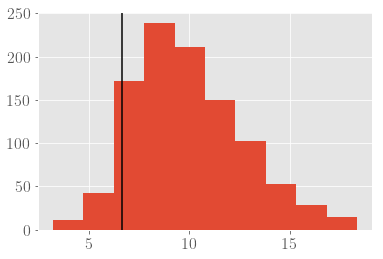

In [543]:
plt.hist(o(o.sample_space()));
plt.axvline(o([0]*o.d), color="k")

In [544]:
rnap1 = 75 - np.arange(7, 13)
rnap2 = 75 - np.arange(31, 38)

crp1 = 75 - np.arange(54, 59)
crp2 = 75 - np.arange(65, 70)

In [585]:
rnap1 = 75 - np.arange(7, 12);
rnap2 = 75 - np.arange(31, 36)

rnap1.shape, rnap2.shape

((5,), (5,))

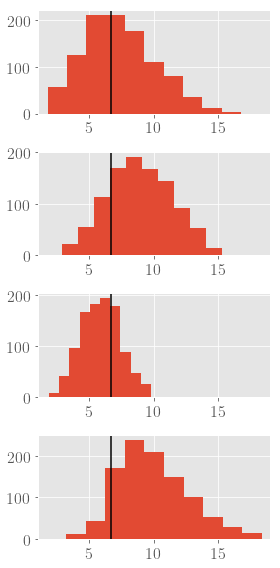

In [586]:
plt.figure(figsize=(4, 8))

ind = crp1
o = LacI(ind.shape[0], ind)
plt.subplot(411)
plt.hist(o(o.sample_space()));
plt.axvline(o([0]*o.d), color="k")
plt.xlim(1, 19)

ind = crp2
o = LacI(ind.shape[0], ind)
plt.subplot(412)
plt.hist(o(o.sample_space()));
plt.axvline(o([0]*o.d), color="k")
plt.xlim(1, 19)

ind = rnap1
o = LacI(ind.shape[0], ind)
plt.subplot(413)
plt.hist(o(o.sample_space()));
plt.axvline(o([0]*o.d), color="k")
plt.xlim(1, 19)

ind = rnap2
o = LacI(ind.shape[0], ind)
plt.subplot(414)
plt.hist(o(o.sample_space()));
plt.axvline(o([0]*o.d), color="k")
plt.xlim(1, 19)

plt.tight_layout()

In [78]:
#ss = o.sample_space()
#seeds = parameter.Space(ss[:, 0]) + parameter.Space(ss[:, 1]) + parameter.Space(ss[:, 2]) + parameter.Space(ss[:, 3])

seeds = parameter.Space(np.arange(4))
for i in range(1, o.d):
    seeds = seeds * parameter.Space(np.arange(4))

rates = parameter.Space(np.array([.1, .25, .5]))

sspace = seeds * rates

In [79]:
b = parameter.Builder(sspace)

def choices(nuc, mut):
    nuc = int(nuc)
    ret = np.ones(4)*mut/3
    ret[nuc] = 1-mut
    return ret

for i in range(o.d):
    b.register(lambda nuc, mut: Choice(choices(nuc, mut)), i=[i, -1])

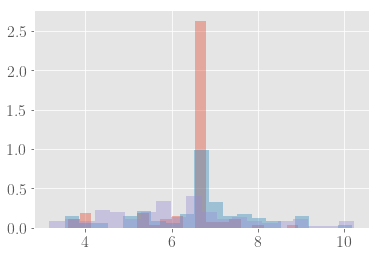

In [82]:
for i in range(3):
    plt.hist(o(np.array([d.sample(100) for d in b.build(i)]).T), alpha=.4, density=True, bins=20)

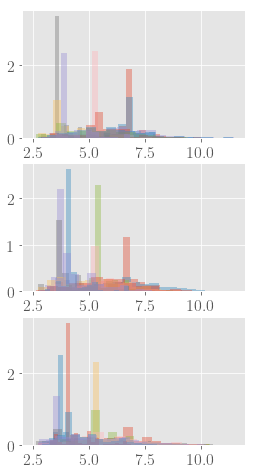

In [83]:
plt.figure(figsize=(4, 8))

for i in range(10):
    for j in range(3):
        plt.subplot(3, 1,j+1)
        plt.hist(o(np.array([d.sample(500) for d in b.build(i+j)]).T), alpha=.4, density=True, bins=20)
        plt.xlim(2, 12)

In [109]:
x = o.sample_space()
y = o(x)
# th = np.random.choice(np.arange(seeds.n), 10, replace=False)

i = 0

acs = []

for i in range(seeds.n):
    acs.append([])
    for j in range(3):
        pdf = np.product([d.pdf(x[:, i]) for i, d in enumerate(b.build(i+j))], axis=0)
        a = np.sum(pdf*y)

        acs[-1].append(a)
        
acs = np.array(acs)

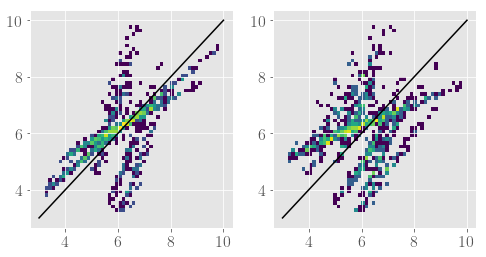

In [119]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
scatterHeatmap(acs[:, 0], acs[:, 1])
plt.plot([3, 10], [3, 10], c="k")

plt.subplot(122)
scatterHeatmap(acs[:, 0], acs[:, 2])
plt.plot([3, 10], [3, 10], c="k")

## sampling 

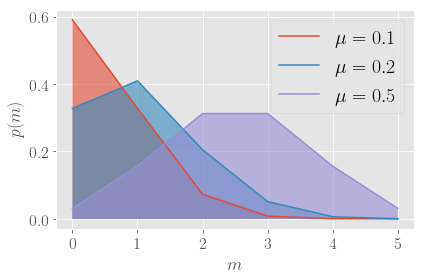

In [371]:
z = np.arange(0, 6).astype(int)

for mu in [0.1, 0.2, .5,]:
    
    plt.plot(z, scipy.stats.binom(z.max(), mu).pmf(z), label=r"$\mu={}$".format(mu))
    plt.fill_between(z, scipy.stats.binom(z.max(), mu).pmf(z), alpha=.6);
    
plt.legend(fontsize=20)
plt.ylabel(r"$p(m)$")
plt.xlabel(r"$m$")

plt.tight_layout()
plt.savefig("figures/lac-cartoon-mutagensis-rates.pdf",bbox_inches="tight")

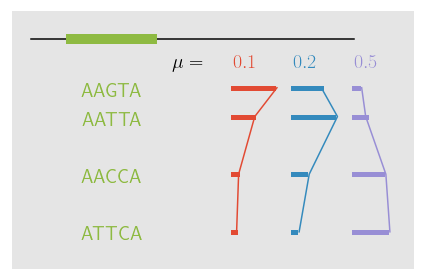

In [264]:
wt = "AAGTA"

plt.plot([.1, .9], [.9, .9], color="k", alpha=1)
plt.plot([.2, .4], [.9, .9], linewidth=10, color="C5")

plt.text(0.3, .7, wt, fontsize=20, ha="center", color="C5")

plt.text(0.3, .6, wt.replace("G", "T"), fontsize=20, ha="center", color="C5")

plt.text(0.3, .4, wt.replace("G", "T").replace("T", "C"), fontsize=20, ha="center", color="C5")

plt.text(0.3, .2, "ATTCA", fontsize=20, ha="center", color="C5")

plt.text(0.45, .8, "$\mu =$", fontsize=20)

plt.text(0.6, .8, "$0.1$", fontsize=20, color="C0")
plt.plot([0.6, 0.7], [0.73, 0.73], color="C0", linewidth=5)
plt.plot([0.6, 0.65], [0.63, 0.63], color="C0", linewidth=5)
plt.plot([0.6, 0.61], [0.43, 0.43], color="C0", linewidth=5)
plt.plot([0.6, 0.605], [0.23, 0.23], color="C0", linewidth=5)
plt.plot([0.61, 0.615, .655, .71], [0.23, .43, 0.63, 0.73], color="C0")

plt.text(0.75, .8, "$0.2$", fontsize=20, color="C1")
plt.plot([0.75, 0.82], [0.73, 0.73], color="C1", linewidth=5)
plt.plot([0.75, 0.85], [0.63, 0.63], color="C1", linewidth=5)
plt.plot([0.75, 0.78], [0.43, 0.43], color="C1", linewidth=5)
plt.plot([0.75, 0.755], [0.23, 0.23], color="C1", linewidth=5)
plt.plot([0.82, 0.86, .79, .765], [.73, .63, .43, .23], color="C1")

plt.text(0.9, .8, "$0.5$", fontsize=20, color="C2")
plt.plot([0.9, 0.91], [0.73, 0.73], color="C2", linewidth=5)
plt.plot([0.9, 0.93], [0.63, 0.63], color="C2", linewidth=5)
plt.plot([0.9, 0.97], [0.43, 0.43], color="C2", linewidth=5)
plt.plot([0.9, 0.98], [0.23, 0.23], color="C2", linewidth=5)
plt.plot([0.92, 0.93, .98, .99], [.73, .63, .43, .23], color="C2")

plt.xlim(0.05, 1.05)
plt.ylim(0.1, 1)
plt.xticks([])
plt.yticks([])
plt.grid(False)

plt.tight_layout()
plt.savefig("figures/lac-cartoon-mutagensis.pdf",bbox_inches="tight")

In [361]:
def landscape(pos, depth=5, opt=None):
    
    o = LacI(pos.shape[0], ind=pos)
    if opt is None:
        opt = o.optimum

    fit = []
    for dist in np.arange(1, depth+1):
        fit.append([])
        for ind in combinations(np.arange(pos.shape[0]), dist):
            for prod in product(*[np.arange(4)]*dist):
                #print( dist, ind, prod, )
                tmp = opt.copy()
                tmp[list(ind)] = np.array(prod)
                fit[-1].append(o(tmp)[0])
                
    return fit

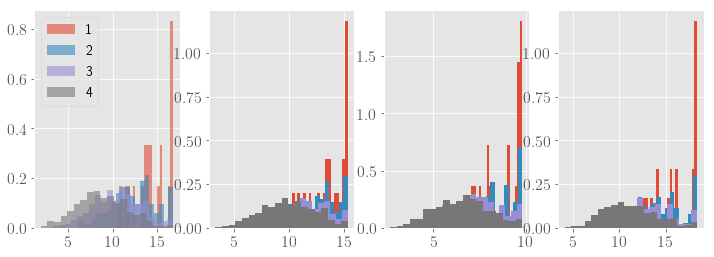

In [587]:
plt.figure(figsize=(12, 4))

plt.subplot(141)
for i, ft in enumerate(landscape(crp1, 4)):
    plt.hist(ft, alpha=.6, density=True, label=i+1, bins=20)

plt.legend()

plt.subplot(142)
for i, ft in enumerate(landscape(crp2, 4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)
    
plt.subplot(143)
for i, ft in enumerate(landscape(rnap1,4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)

plt.subplot(144)
for i, ft in enumerate(landscape(rnap2, 4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)

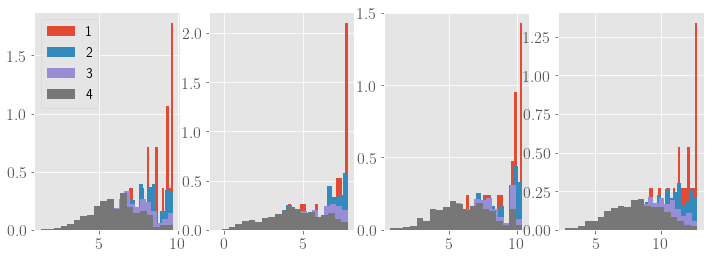

In [588]:
plt.figure(figsize=(12, 4))

plt.subplot(141)
for i, ft in enumerate(landscape(np.arange(30,35), 4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)
    
plt.legend()

plt.subplot(142)
for i, ft in enumerate(landscape(np.arange(50,55), 4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)

plt.subplot(143)
for i, ft in enumerate(landscape(np.arange(55,60),4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)

plt.subplot(144)
for i, ft in enumerate(landscape(np.arange(5,10), 4)):
    plt.hist(ft, alpha=1, density=True, label=i+1, bins=20)
Tr    